## Визуализация данных



Материалы:
* 
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
import seaborn as sns

## Разминка

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

(3, 1095)


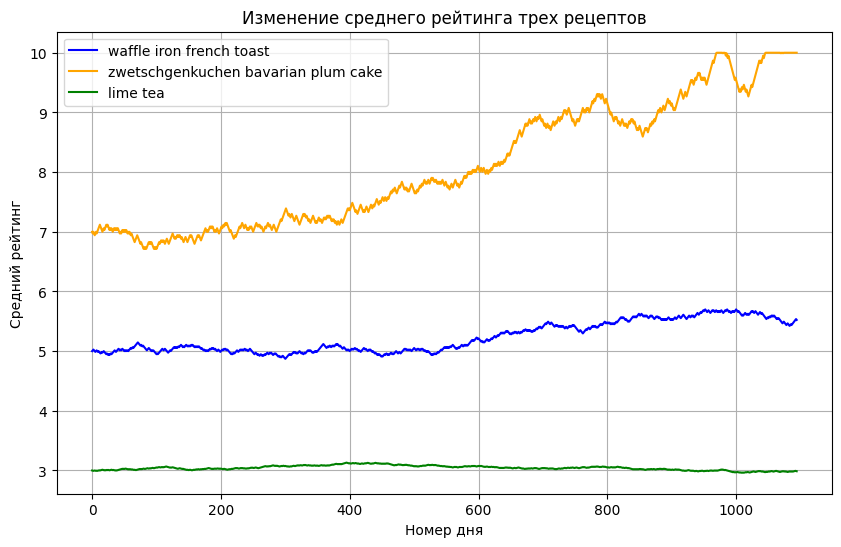

In [4]:
# Загрузка данных из файла average_ratings.npy
average_ratings = np.load('average_ratings.npy')

# Проверяем форму загруженных данных
print(average_ratings.shape)

# Создаем массив номеров дней
days = np.arange(average_ratings.shape[1])  # количество дней

# Создаем график
plt.figure(figsize=(10, 6))

# Строим временные ряды для каждого рецепта
plt.plot(days, average_ratings[0], label='waffle iron french toast', color='blue')
plt.plot(days, average_ratings[1], label='zwetschgenkuchen bavarian plum cake', color='orange')
plt.plot(days, average_ratings[2], label='lime tea', color='green')

# Добавляем подписи осей
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')

# Добавляем заголовок
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.grid()
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


(3, 1095)


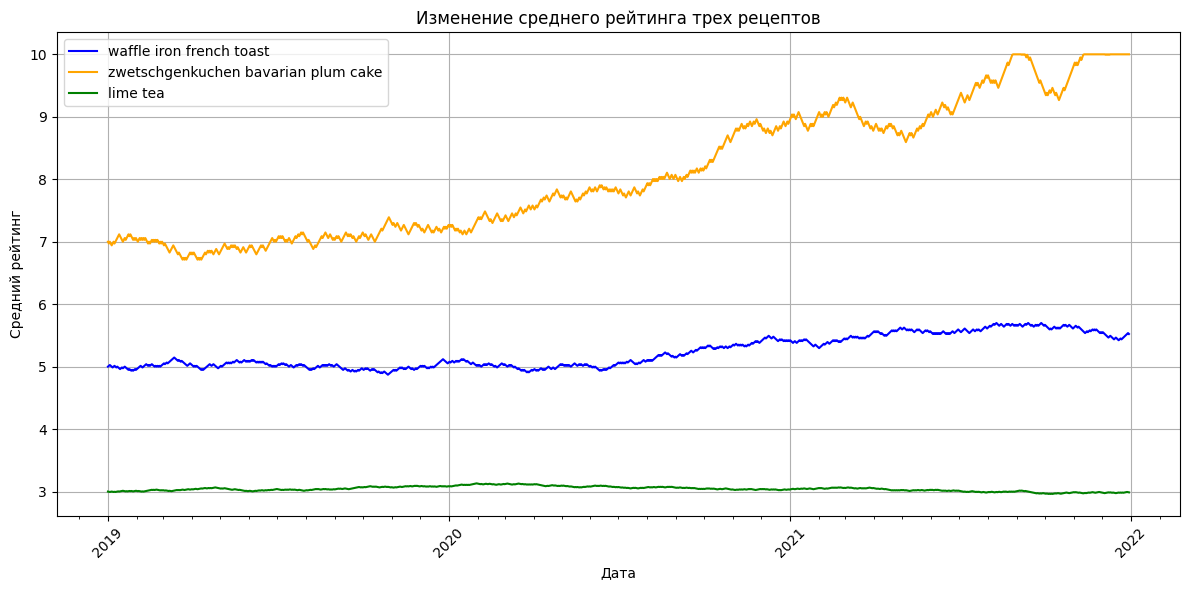

In [5]:
# Загрузка данных из файла average_ratings.npy
average_ratings = np.load('average_ratings.npy')

# Создание диапазона дат от 01.01.2019 до 30.12.2021
date_range = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

# Проверяем форму загруженных данных
print(average_ratings.shape)

# Создаем график
plt.figure(figsize=(12, 6))

# Строим временные ряды для каждого рецепта
plt.plot(date_range, average_ratings[0], label='waffle iron french toast', color='blue')
plt.plot(date_range, average_ratings[1], label='zwetschgenkuchen bavarian plum cake', color='orange')
plt.plot(date_range, average_ratings[2], label='lime tea', color='green')

# Настройка формата отображения дат на оси X
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Основные метки - годы
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Вспомогательные метки - месяцы
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Формат для основных меток

# Добавляем подписи осей
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

# Добавляем заголовок
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавляем легенду
plt.legend()

# Отображаем сетку и график
plt.grid()
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.tight_layout()  # Подгоняем элементы графика
plt.show()


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

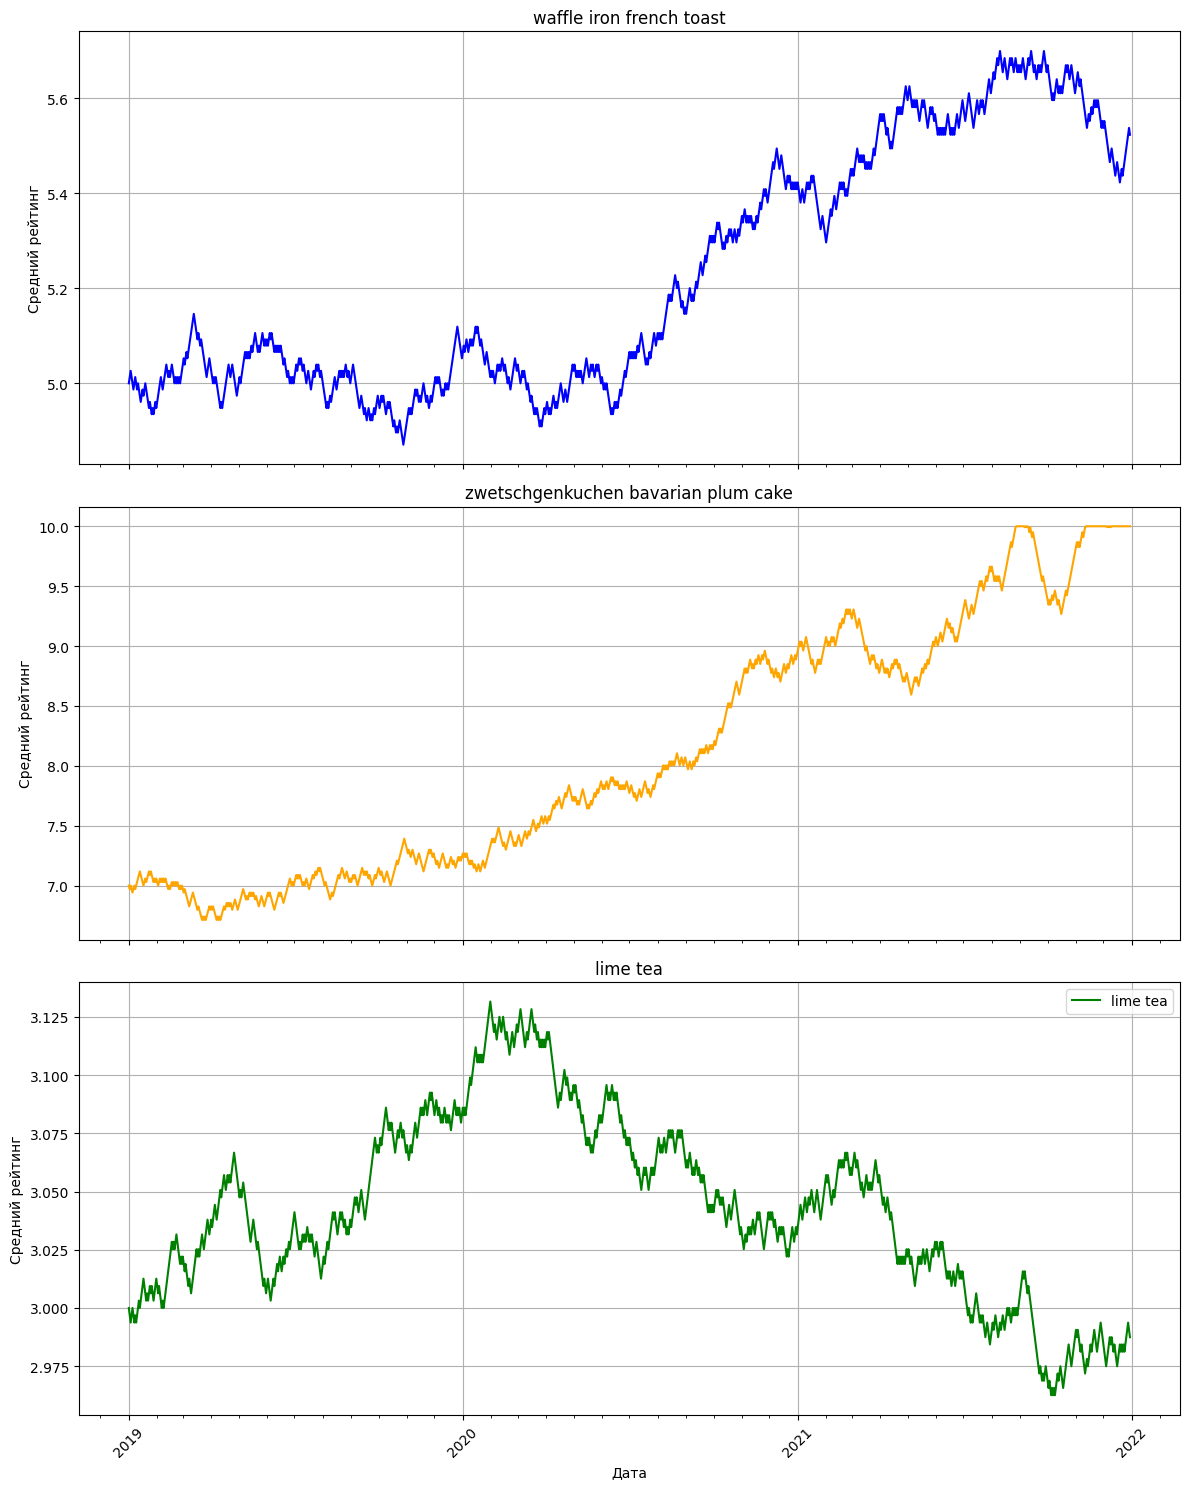

In [6]:
# Загрузка данных из файла average_ratings.npy
average_ratings = np.load('average_ratings.npy')

# Создание диапазона дат от 01.01.2019 до 30.12.2021
date_range = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

# Создаем фигуру и оси для трех графиков
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Настройка цвета и меток для каждого рецепта
recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
colors = ['blue', 'orange', 'green']

# Строим временные ряды для каждого рецепта на отдельных графиках
for i in range(3):
    axs[i].plot(date_range, average_ratings[i], label=recipes[i], color=colors[i])
    axs[i].set_ylabel('Средний рейтинг')
    axs[i].set_title(recipes[i])
    axs[i].grid()

# Настройка формата отображения дат на оси X
axs[2].xaxis.set_major_locator(mdates.YearLocator())  # Основные метки - годы
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())  # Вспомогательные метки - месяцы
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Формат для основных меток

# Добавляем подпись оси X только к нижнему графику
axs[2].set_xlabel('Дата')

# Добавляем легенду только к нижнему графику
axs[2].legend()

# Поворачиваем метки по оси X для лучшей читаемости
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[2].xaxis.get_minorticklabels(), rotation=45)

# Подгоняем элементы графика
plt.tight_layout()
plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


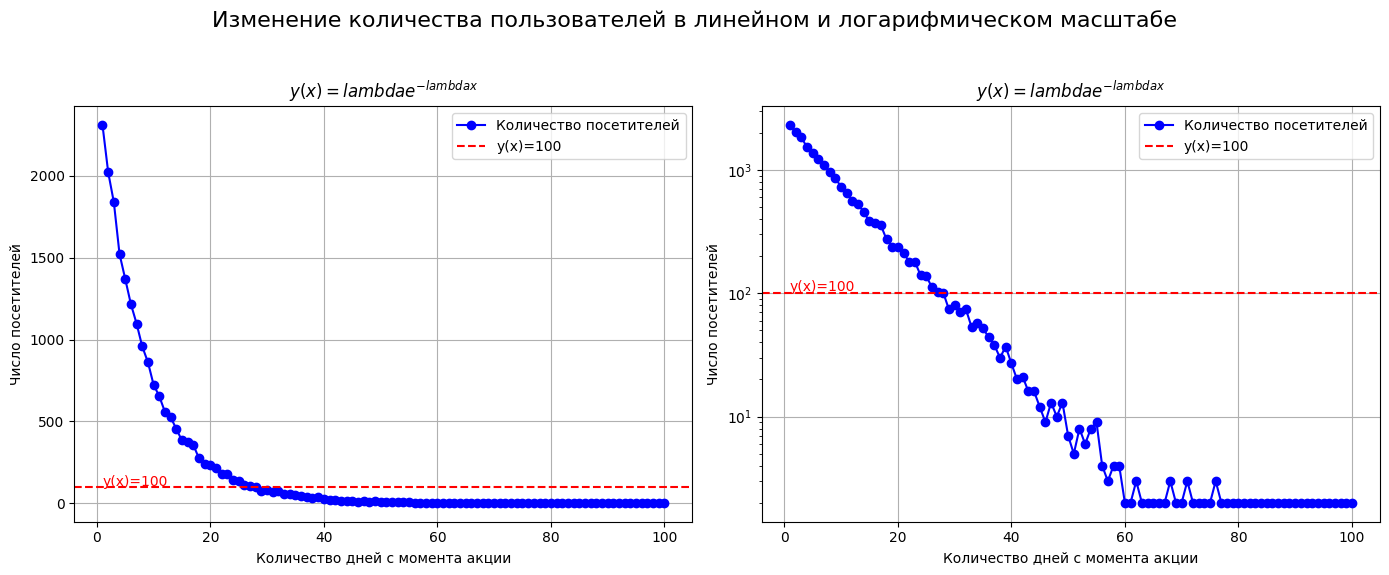

In [7]:
# Загрузка данных из файла visitors.npy
visitors = np.load('visitors.npy')

# Создание массива дней
days = np.arange(1, len(visitors) + 1)

# Создание фигуры и осей для двух графиков
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Левый график (линейный масштаб)
axs[0].plot(days, visitors, marker='o', color='blue', label='Количество посетителей')
axs[0].axhline(y=100, color='red', linestyle='--', label='y(x)=100')
axs[0].text(1, 105, 'y(x)=100', color='red', fontsize=10)
axs[0].set_title(r'$y(x)=lambda e^{-lambda x}$', fontsize=12)
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')
axs[0].grid()
axs[0].legend()

# Правый график (логарифмический масштаб)
axs[1].plot(days, visitors, marker='o', color='blue', label='Количество посетителей')
axs[1].axhline(y=100, color='red', linestyle='--', label='y(x)=100')
axs[1].text(1, 105, 'y(x)=100', color='red', fontsize=10)
axs[1].set_title(r'$y(x)=lambda e^{-lambda x}$', fontsize=12)
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')
axs[1].set_yscale('log')  # Установка логарифмического масштаба по оси Y
axs[1].grid()
axs[1].legend()

# Общий заголовок для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=16)

# Подгоняем элементы графика
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

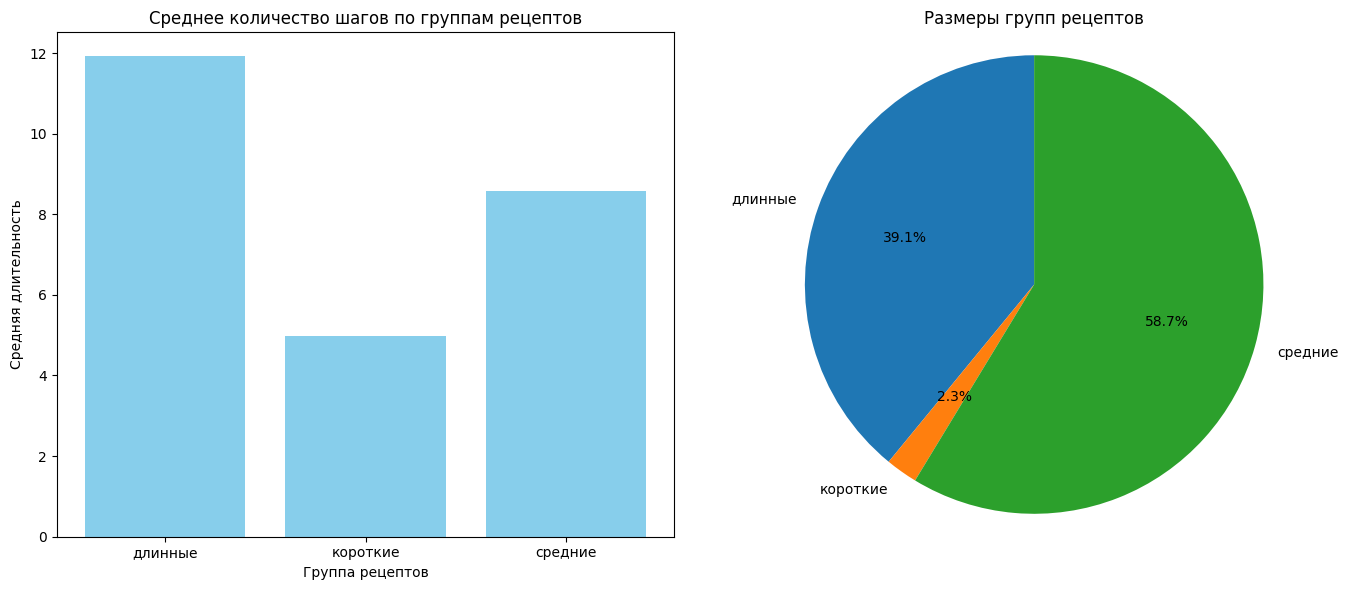

In [8]:
# Загрузка данных
recipes = pd.read_csv('recipes_sample.csv')  
reviews = pd.read_csv('reviews_sample.csv')  

# Определение групп рецептов
def categorize_recipe(row):
    if row['minutes'] < 5:
        return 'короткие'
    elif 5 <= row['minutes'] < 50:
        return 'средние'
    else:
        return 'длинные'

recipes['group'] = recipes.apply(categorize_recipe, axis=1)

# Группировка по категориям и расчет среднего количества шагов и размера группы
grouped = recipes.groupby('group').agg(
    average_steps=('n_steps', 'mean'),
    group_size=('n_steps', 'size')
).reset_index()

# Построение графиков
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))

# Столбчатая диаграмма для среднего количества шагов
ax1[0].bar(grouped['group'], grouped['average_steps'], color='skyblue')
ax1[0].set_xlabel('Группа рецептов')
ax1[0].set_ylabel('Средняя длительность')
ax1[0].set_title('Среднее количество шагов по группам рецептов')

# Круговая диаграмма для размеров групп
ax1[1].pie(grouped['group_size'], labels=grouped['group'], autopct='%1.1f%%', startangle=90)
ax1[1].axis('equal')  # Для равного соотношения сторон
ax1[1].set_title('Размеры групп рецептов')

# Отображение графиков
plt.tight_layout()
plt.show()


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

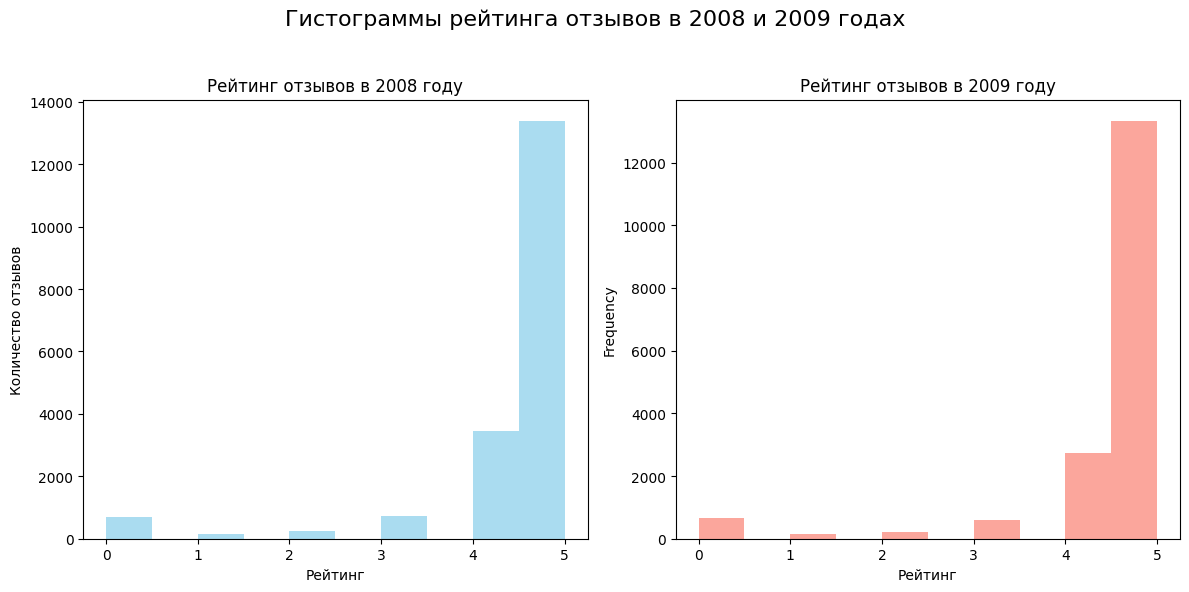

In [9]:
# Загрузка данных
reviews = pd.read_csv('reviews_sample.csv')

# Преобразование столбца с датами в формат datetime, если это еще не сделано
reviews['date'] = pd.to_datetime(reviews['date'])

# Фильтрация отзывов за 2008 и 2009 годы
filtered_reviews = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

# Создание двух отдельных DataFrame для каждого года
reviews_2008 = filtered_reviews[filtered_reviews['date'].dt.year == 2008]
reviews_2009 = filtered_reviews[filtered_reviews['date'].dt.year == 2009]

# Создание гистограмм
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма для 2008 года
reviews_2008['rating'].plot.hist(ax=ax[0], bins=10, color='skyblue', alpha=0.7)
ax[0].set_title('Рейтинг отзывов в 2008 году')
ax[0].set_xlabel('Рейтинг')
ax[0].set_ylabel('Количество отзывов')

# Гистограмма для 2009 года
reviews_2009['rating'].plot.hist(ax=ax[1], bins=10, color='salmon', alpha=0.7)
ax[1].set_title('Рейтинг отзывов в 2009 году')
ax[1].set_xlabel('Рейтинг')

# Общая подпись для рисунка
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=16)

# Настройка отступов, чтобы подписи не "наезжали" друг на друга
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Увеличиваем верхний отступ для общей подписи

# Отображение графиков
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

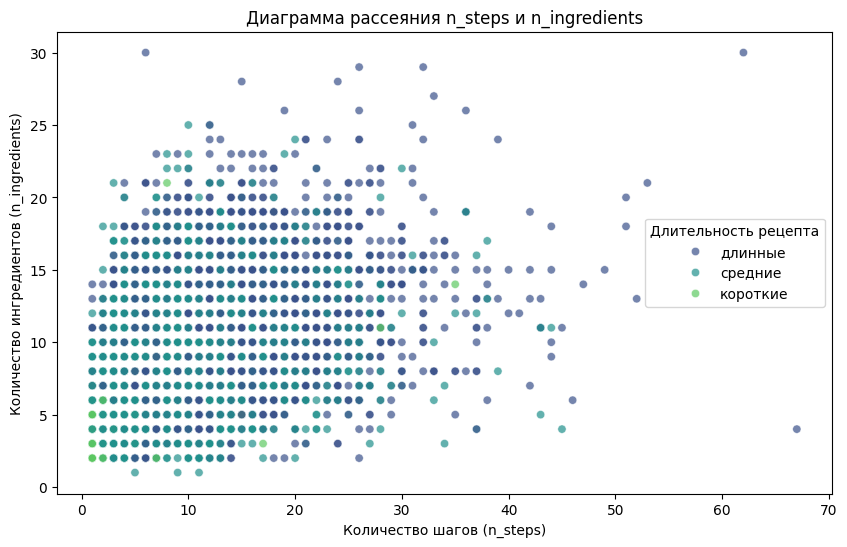

In [15]:
# Загрузка данных
recipes = pd.read_csv('recipes_sample.csv')  
reviews = pd.read_csv('reviews_sample.csv')  

# Определение групп рецептов
def categorize_recipe(row):
    if row['minutes'] < 5:
        return 'короткие'
    elif 5 <= row['minutes'] < 50:
        return 'средние'
    else:
        return 'длинные'

recipes['group'] = recipes.apply(categorize_recipe, axis=1)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='group', palette='viridis', alpha=0.7)

# Добавление заголовка
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel('Количество шагов (n_steps)')
plt.ylabel('Количество ингредиентов (n_ingredients)')

# Отображение графика
plt.legend(title='Длительность рецепта')
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

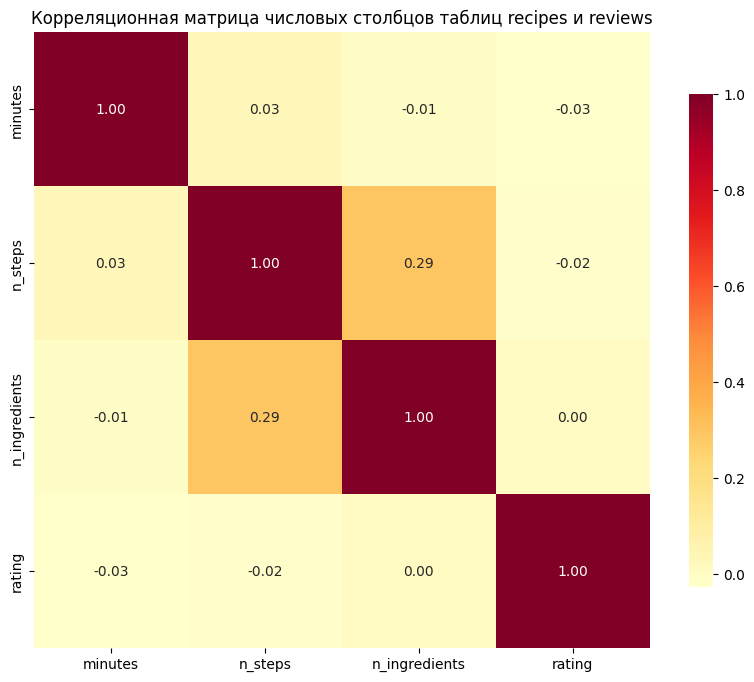

In [19]:
# Загрузка данных
recipes = pd.read_csv('recipes_sample.csv')  
reviews = pd.read_csv('reviews_sample.csv')  

# Объединение таблиц по столбцу id из recipes и recipe_id из reviews
merged_data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# Выбор нужных столбцов для корреляции
correlation_data = merged_data[['minutes', 'n_steps', 'n_ingredients', 'rating']]

# Вычисление корреляционной матрицы
correlation_matrix = correlation_data.corr()

# Визуализация корреляционной матрицы с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrRd', square=True, cbar_kws={"shrink": .8})

# Добавление заголовка
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()
